In [ ]:
# Importazione delle librerie necessarie

import pandas as pd
import numpy as np
import os
import sys
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Montaggio di Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caricamento delle etichette delle emozioni

dataset_path = '/content/drive/MyDrive/ABEC/DATASET'
emotion_labels = sorted(os.listdir(dataset_path))
print(emotion_labels)

['ANGER', 'DISGUST', 'FEAR', 'HAPPINESS', 'NEUTRALITY', 'SADNESS']


In [ ]:
# Caricamento dei files

paths = []
labels = []
for emotion in emotion_labels:
  emotion_path = os.listdir(os.path.join(dataset_path, emotion))
  for filename in emotion_path:
    paths.append(os.path.join(dataset_path, emotion, filename))
    labels.append(emotion)
print('Dataset caricato')

Dataset caricato


In [ ]:
# Creazione del DataFrame

df = pd.DataFrame()
df['simple'] = paths
df['emotions'] = labels
df.head()

,simple,emotions
0,/content/drive/MyDrive/ABEC/DATASET/ANGER/1020...,ANGER
1,/content/drive/MyDrive/ABEC/DATASET/ANGER/1020...,ANGER
2,/content/drive/MyDrive/ABEC/DATASET/ANGER/1020...,ANGER
3,/content/drive/MyDrive/ABEC/DATASET/ANGER/1020...,ANGER
4,/content/drive/MyDrive/ABEC/DATASET/ANGER/1020...,ANGER


In [ ]:
# Funzioni per la data augmentation

def noise(filename):
    data, sr = librosa.load(filename, duration=3, offset=0.5)
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(filename, rate=0.8):
    data, sr = librosa.load(filename, duration=3, offset=0.5)
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(filename):
    data, sr = librosa.load(filename, duration=3, offset=0.5)
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(filename, n_steps=7):
    data, sr = librosa.load(filename, duration=3, offset=0.5)
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)

Audio senza modifiche


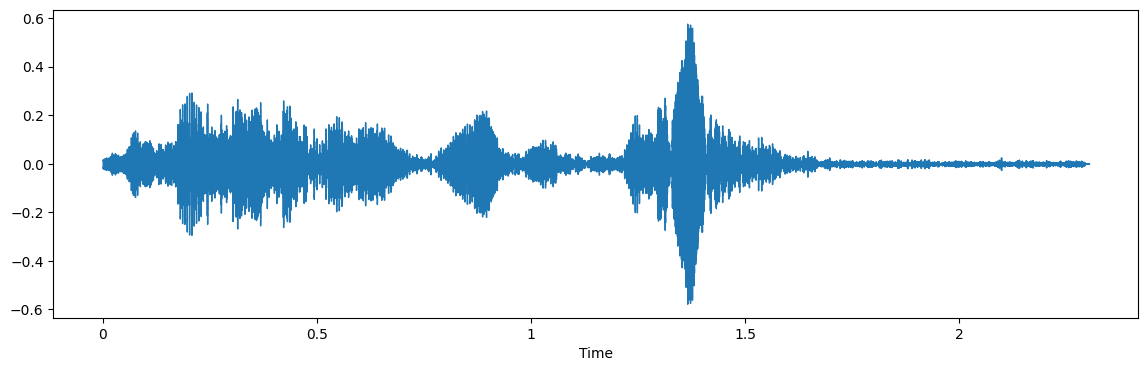

In [ ]:
# Esempio per provare le tecniche di data augmentation

path = np.array(df.simple)[1]

# Audio senza augmentation

print('Audio senza modifiche')
plt.figure(figsize=(14,4))
data, sr = librosa.load(path, duration=3, offset=0.5)
librosa.display.waveshow(y=data, sr=sr)
Audio(path)

Inserimento del rumore


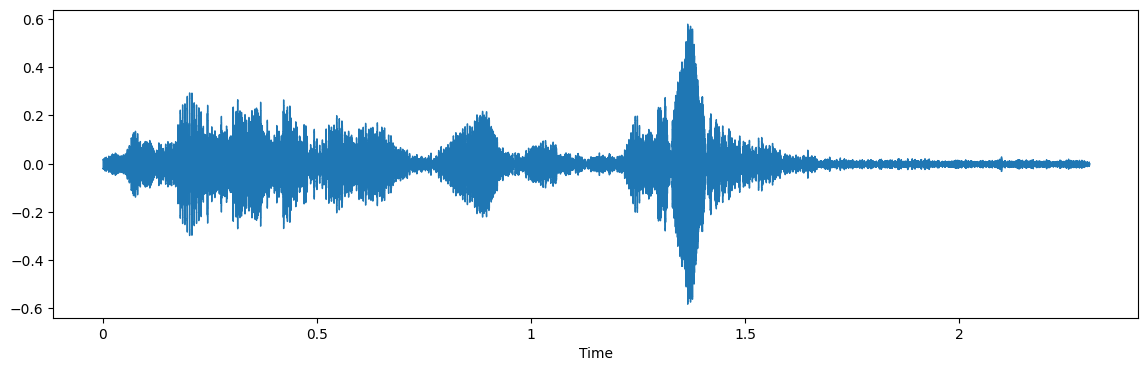

In [ ]:
# Inserimento del rumore

print('Inserimento del rumore')
x = noise(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

Stretching


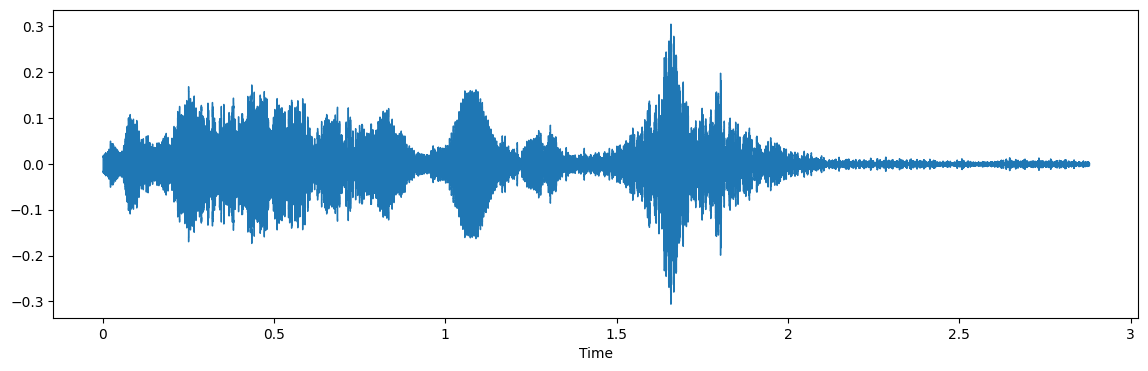

In [ ]:
# Stretching dell'audio

print('Stretching')
x = stretch(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

Shifting


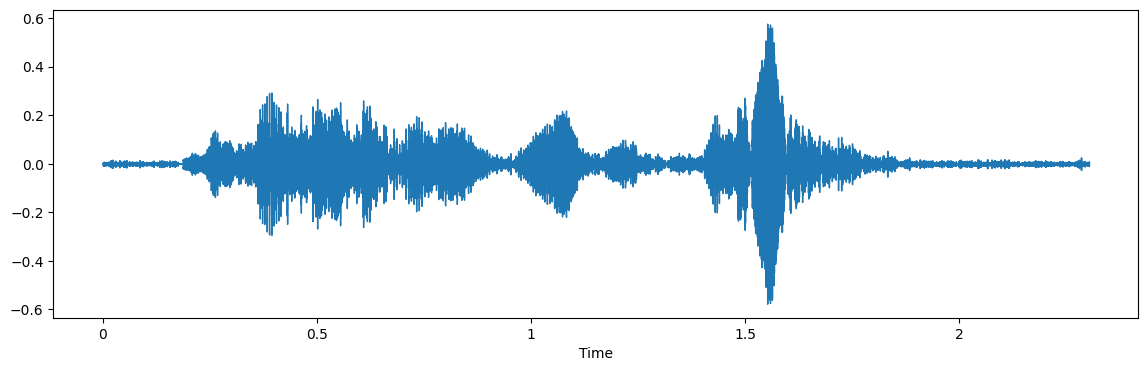

In [ ]:
# Spostamento nel tempo

print('Shifting')
x = shift(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

Pitching


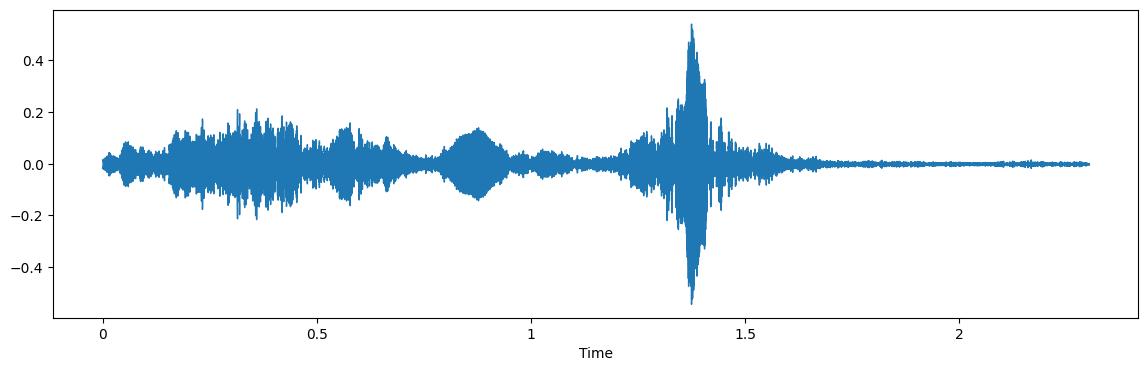

In [ ]:
# Cambio della tonalità

print('Pitching')
x = pitch(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

In [ ]:
# Funzione per l'estrazione delle features

# MFCC
def extract_mfcc(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# CHROMA
def extract_chromagram(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    return chroma

# MEL-SPECTOGRAM
def extract_melspectrogram(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    return mel

# TONNETZ REPRESENTATION
def extract_tonnetz(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr), axis=1)
    return tonnetz

# SPECTRAL CONTRAST

def extract_spectral_contrast(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)
    return spectral_contrast

# ZERO-CROSSING RATE

def extract_zero_crossing_rate(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=y), axis=1)
    return zcr

# HARMONICS-TO-NOISE RATIO

def extract_hnr(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    harmonics = librosa.effects.harmonic(y)
    noise = y - harmonics
    hnr = np.sum(harmonics**2) / np.sum(noise**2 + 1e-10)
    return hnr

# TEAGER ENERGY OPERATOR

def extract_teager_energy_operator(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    teo = np.mean(librosa.feature.rms(y=y), axis=1)
    return teo

# SHORT-TERM ENERGY

def extract_short_term_energy(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    ste = np.mean(librosa.feature.rms(y=y), axis=1)
    return ste

# POWER SPECTRAL DENSITY

def extract_power_spectral_density(audio_data, sample_rate):
    if isinstance(audio_data, np.ndarray):
        y = audio_data
        sr = sample_rate
        if sr is None:
            raise ValueError("Sample rate (sr) must be provided when audio_data is a NumPy array.")
    psd_abs = np.abs(np.fft.fft(y)) ** 2
    psd = np.mean(psd_abs)
    return psd

In [ ]:
# Estrazione delle features caso 1

mfcc, chroma, mel, tonnetz, sc, label = [], [], [], [], [], []

for path, emotion in zip(df.simple, df.emotions):
    y, sr = librosa.load(path, duration=3, offset=0.5)
    original_mfcc = extract_mfcc(y, sr)
    mfcc.append(original_mfcc)
    original_chroma = extract_chromagram(y, sr)
    chroma.append(original_chroma)
    original_mel = extract_melspectrogram(y, sr)
    mel.append(original_mel)
    original_tonnetz = extract_tonnetz(y, sr)
    tonnetz.append(original_tonnetz)
    original_sc = extract_spectral_contrast(y, sr)
    sc.append(original_sc)
    label.append(emotion)
    for augmented_audio in [noise(path), stretch(path), shift(path), pitch(path)]:
        augmented_mfcc = extract_mfcc(augmented_audio, sr)
        mfcc.append(augmented_mfcc)
        augmented_chroma = extract_chromagram(augmented_audio, sr)
        chroma.append(augmented_chroma)
        augmented_mel = extract_melspectrogram(augmented_audio, sr)
        mel.append(augmented_mel)
        augmented_tonnetz = extract_tonnetz(augmented_audio, sr)
        tonnetz.append(augmented_tonnetz)
        augmented_sc = extract_spectral_contrast(augmented_audio, sr)
        sc.append(augmented_sc)
        label.append(emotion)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=759
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=759
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=949
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=794
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=992
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=840
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: 

In [ ]:
# Creazione di un dataframe per le features

features_df = pd.DataFrame()
features_df['mfcc'] = mfcc
features_df['chroma'] = chroma
features_df['mel'] = mel
features_df['tonnetz'] = tonnetz
features_df['spectral_contrast'] = sc
features_df['label'] = label
features_df.head()

,mfcc,chroma,mel,tonnetz,spectral_contrast,label
0,"[-346.29526, 137.64049, 8.69169, 35.311882, -9...","[0.29201826, 0.38502562, 0.29120973, 0.3123079...","[0.07737846, 0.034783144, 0.04425149, 0.062268...","[-0.0430883237494016, -0.05187423004202757, -0...","[13.31842625645253, 16.873059068316007, 20.454...",ANGER
1,"[-205.49876879272944, 44.45666724381474, 22.02...","[0.39116075441203946, 0.4594201150786906, 0.38...","[0.08461332760294109, 0.04076906607106719, 0.0...","[-0.04235175747574739, -0.058032173052157694, ...","[12.685969741383444, 15.88780895567124, 18.579...",ANGER
2,"[-375.05515, 132.2356, 10.073215, 30.356653, -...","[0.29833022, 0.37963942, 0.2675938, 0.32496527...","[0.037430894, 0.015797297, 0.018807301, 0.0287...","[-0.07300732215248174, -0.052441760849361405, ...","[14.125213326380202, 17.16686360031749, 21.117...",ANGER
3,"[-344.04053, 137.3057, 9.162203, 34.567955, -9...","[0.32881013, 0.37016758, 0.27752447, 0.3208849...","[0.079234466, 0.035795696, 0.045172043, 0.0623...","[-0.0706774184565807, -0.05674157194124169, -0...","[13.294224923946032, 16.549524811498856, 20.30...",ANGER
4,"[-345.86893, 116.51579, 9.756774, 5.285912, -7...","[0.2184162, 0.2955816, 0.3488706, 0.49626875, ...","[0.027997933, 0.019921398, 0.008562651, 0.0155...","[-0.08157975611316184, -0.008267977533426438, ...","[13.975499943771492, 16.00863120845709, 21.480...",ANGER


In [ ]:
features_df.shape

(37210, 6)

In [ ]:
# Salvataggio del DataFrame di base attraverso l'utilizzo di Pickle

features_df.to_pickle('Base2.pkl')

In [ ]:
# Estrazione delle features caso 2

zc, hnr, teo, ste, psd, label = [], [], [], [], [], []

for path, emotion in zip(df.simple, df.emotions):
    y, sr = librosa.load(path, duration=3, offset=0.5)
    original_zc = extract_zero_crossing_rate(y, sr)
    zc.append(original_zc)
    original_hnr = extract_hnr(y, sr)
    hnr.append(original_hnr)
    original_teo = extract_teager_energy_operator(y, sr)
    teo.append(original_teo)
    original_ste = extract_short_term_energy(y, sr)
    ste.append(original_ste)
    original_psd = extract_power_spectral_density(y, sr)
    psd.append(original_psd)
    label.append(emotion)
    for augmented_audio in [noise(path), stretch(path), shift(path), pitch(path)]:
        augmented_zc = extract_zero_crossing_rate(augmented_audio, sr)
        zc.append(augmented_zc)
        augmented_hnr = extract_hnr(augmented_audio, sr)
        hnr.append(augmented_hnr)
        augmented_teo = extract_teager_energy_operator(augmented_audio, sr)
        teo.append(augmented_teo)
        augmented_ste = extract_short_term_energy(augmented_audio, sr)
        ste.append(augmented_ste)
        augmented_psd = extract_power_spectral_density(augmented_audio, sr)
        psd.append(augmented_psd)
        label.append(emotion)

In [ ]:
# Completamento del dataframe per le features

features_df['zero-crossing'] = zc
features_df['hnr'] = hnr
features_df['teo'] = teo
features_df['ste'] = ste
features_df['psd'] = psd
features_df['label'] = label
features_df.head()

,mfcc,chroma,mel,tonnetz,spectral_contrast,label,zero-crossing,hnr,teo,ste,psd
0,"[-346.29526, 137.64049, 8.69169, 35.311882, -9...","[0.29201826, 0.38502562, 0.29120973, 0.3123079...","[0.07737846, 0.034783144, 0.04425149, 0.062268...","[-0.0430883237494016, -0.05187423004202757, -0...","[13.31842625645253, 16.873059068316007, 20.454...",ANGER,[0.06904810855263158],4.752542,[0.037368394],[0.037368394],118.536977
1,"[-205.49876879272944, 44.45666724381474, 22.02...","[0.39116075441203946, 0.4594201150786906, 0.38...","[0.08461332760294109, 0.04076906607106719, 0.0...","[-0.04235175747574739, -0.058032173052157694, ...","[12.685969741383444, 15.88780895567124, 18.579...",ANGER,[0.1859631990131579],4.735016,[0.038343303],[0.038343303],120.125759
2,"[-375.05515, 132.2356, 10.073215, 30.356653, -...","[0.29833022, 0.37963942, 0.2675938, 0.32496527...","[0.037430894, 0.015797297, 0.018807301, 0.0287...","[-0.07300732215248174, -0.052441760849361405, ...","[14.125213326380202, 17.16686360031749, 21.117...",ANGER,[0.07325860031512606],5.701991,[0.026131568],[0.026131568],74.026113
3,"[-344.04053, 137.3057, 9.162203, 34.567955, -9...","[0.32881013, 0.37016758, 0.27752447, 0.3208849...","[0.079234466, 0.035795696, 0.045172043, 0.0623...","[-0.0706774184565807, -0.05674157194124169, -0...","[13.294224923946032, 16.549524811498856, 20.30...",ANGER,[0.06951069078947368],4.189364,[0.03755513],[0.03755513],118.536977
4,"[-345.86893, 116.51579, 9.756774, 5.285912, -7...","[0.2184162, 0.2955816, 0.3488706, 0.49626875, ...","[0.027997933, 0.019921398, 0.008562651, 0.0155...","[-0.08157975611316184, -0.008267977533426438, ...","[13.975499943771492, 16.00863120845709, 21.480...",ANGER,[0.09182771381578947],2.037568,[0.027112331],[0.027112331],63.006963


In [ ]:
features_df.shape

(37210, 11)

In [ ]:
# Salvataggio del DataFrame totale attraverso l'utilizzo di Pickle

features_df.to_pickle('Totale2.pkl')